# Import Data and Load Data

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# encoder
from sklearn.preprocessing import LabelEncoder

# Search CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# menampilkan semua kolom
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Project Data Science Academy/Dataset/data_1.csv')

# Data Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50705 entries, 0 to 50704
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             50705 non-null  float64
 1   first_name              50705 non-null  object 
 2   last_name               50705 non-null  object 
 3   username                50705 non-null  object 
 4   email                   50705 non-null  object 
 5   gender_x                50705 non-null  object 
 6   birthdate               50705 non-null  object 
 7   device_type             50705 non-null  object 
 8   device_id               50705 non-null  object 
 9   device_version          50705 non-null  object 
 10  home_location_lat       50705 non-null  float64
 11  home_location_long      50705 non-null  float64
 12  home_location           50705 non-null  object 
 13  home_country            50705 non-null  object 
 14  first_join_date         50705 non-null

In [ ]:
# menghapus kolom
df = df.drop(['gender_y', 'masterCategory',	'subCategory',	'articleType',	'baseColour',
              'season',	'year',	'usage',	'productDisplayName'], axis=1)

In [ ]:
# fill missing value
df['transaction_amount'].fillna(0, axis=0, inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df

,customer_id,first_name,last_name,username,email,gender_x,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,last_transaction,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,event_name,event_time,event_id,traffic_source,event_metadata,customer_age,class_age,total_promo_amount,total_shipment_fee,promo_usage_count,transaction_amount,total_money_spent,range_days,is_loyal
0,73773.0,Dacin,Gunawan,b7d339e1-aa83-4bdf-b523-8b850a9455ad,b7d339e1_aa83_4bdf_b523_8b850a9455ad@startupca...,M,1991-02-20,Android,d04602f9-8fc8-405e-ac12-8bc5cce3db69,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30,2016-07-01 22:32:45.218400,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,"[{'product_id': 32185, 'quantity': 1, 'item_pr...",Debit Card,Success,0.0,NONE,10000.0,2016-07-06 16:02:10.388144,-1.066405,113.575300,256670.0,32185,BOOKING,2016-07-01 22:32:45.218400,5dde66f6-9c9b-4f05-98ac-57483193fac7,MOBILE,{'payment_status': 'Success'},31.0,adults,0.0,10000.0,0,1.0,256670.0,2221,0
1,30771.0,Ghaliyati,Uyainah,eb1ca512-ad85-4c87-9d44-bfbea94e3733,eb1ca512_ad85_4c87_9d44_bfbea94e3733@startupca...,F,2005-05-01,iOS,d7628da3-4b69-4b05-bac1-44993a40cc36,iPad; CPU iPad OS 6_1_6 like Mac OS X,-7.593732,131.616450,Maluku,Indonesia,2016-07-02,2016-07-02 20:01:04.996529,27c08004-141d-4ee8-bf88-63224906e52d,54a40fd2-7446-40b6-97a4-b51600d5df54,"[{'product_id': 18092, 'quantity': 1, 'item_pr...",Credit Card,Success,5272.0,WEEKENDSERU,5000.0,2016-07-06 16:00:51.370901,-7.593732,131.616450,199897.0,18092,BOOKING,2016-07-02 20:01:04.996529,0561963a-5028-4313-b6b3-bc478e0b2bc6,MOBILE,{'payment_status': 'Success'},17.0,teenager,5272.0,5000.0,1,1.0,199897.0,2220,0
2,67563.0,Melinda,Hasanah,bdc7e701-230b-479a-865d-417a469f4987,bdc7e701_230b_479a_865d_417a469f4987@startupca...,F,2008-12-10,Android,6f8d47ab-e140-492d-af7b-ae1a9b7cbcdb,Android 2.3.4,-6.297146,106.847493,Jakarta Raya,Indonesia,2016-07-03,2016-07-03 16:25:01.401472,34fe80aa-7fe8-4da2-aa19-68a0c8c073b8,2a6aa94f-0b0d-42ce-8615-619cc437dd0c,"[{'product_id': 47432, 'quantity': 3, 'item_pr...",Gopay,Success,0.0,NONE,10000.0,2016-07-09 14:36:17.739418,-6.297146,106.847493,996610.0,47432,BOOKING,2016-07-03 16:25:01.401472,3cd30105-86bd-4931-820b-af60f7d7e5cb,MOBILE,{'payment_status': 'Success'},14.0,teenager,0.0,10000.0,0,1.0,996610.0,2219,0
3,22844.0,Queen,Haryanti,dacf34fe-e5bc-4769-8a20-c6f26d72a6d8,dacf34fe_e5bc_4769_8a20_c6f26d72a6d8@zakyfound...,F,1993-04-30,Android,bdd51573-2110-4bc3-ab5d-1789242717f8,Android 5.0,-6.220949,106.783241,Jakarta Raya,Indonesia,2016-07-02,2016-07-04 00:58:13.525069,de1de31a-b71a-4afd-8eec-9946f398b441,8bcd8c49-fe5d-4121-b967-b3964b537c30,"[{'product_id': 25047, 'quantity': 1, 'item_pr...",Gopay,Success,5952.0,AZ2022,10000.0,2016-07-10 01:34:45.509511,-7.435797,108.745902,215548.0,25047,BOOKING,2016-07-04 00:58:13.525069,7bebf1fe-46cb-4524-96e8-1197629792a6,MOBILE,{'payment_status': 'Success'},29.0,adults,5952.0,10000.0,1,1.0,215548.0,2218,0
4,9914.0,Baktianto,Iswahyudi,cbf3e32b-42ff-4d0c-a3a3-e6e0a1e8aab3,cbf3e32b_42ff_4d0c_a3a3_e6e0a1e8aab3@zakyfound...,M,1996-01-30,iOS,6ee598b2-72f1-457b-b2b5-30efd2e965ba,iPhone; CPU iPhone OS 7_1_2 like Mac OS X,2.274928,99.001182,Sumatera Utara,Indonesia,2016-07-04,2016-07-04 18:10:42.766218,8714130c-06b7-491d-a58a-edf384a77bba,2cb5c61d-a740-472f-92c8-c777e636fc6a,"[{'product_id': 43464, 'quantity': 1, 'item_pr...",Credit Card,Success,6060.0,AZ2022,15000.0,2016-07-06 18:28:35.039732,-2.320134,121.083536,336925.0,43464,BOOKING,2016-07-04 18:10:42.766218,08490bb0-8f6c-4d52-a6e5-1a33eecf9175,MOBILE,{'payment_status': 'Success'},27.0,adults,6060.0,15000.0,1,1.0,336925.0,2218,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
# mengganti nama kolom
df = df.rename(columns={'gender_x': 'gender'})

In [ ]:
df.isnull().sum()

customer_id               0
first_name                0
last_name                 0
username                  0
email                     0
gender                    0
birthdate                 0
device_type               0
device_id                 0
device_version            0
home_location_lat         0
home_location_long        0
home_location             0
home_country              0
first_join_date           0
last_transaction          0
booking_id                0
session_id                0
product_metadata          0
payment_method            0
payment_status            0
promo_amount              0
promo_code                0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
product_id                0
event_name                0
event_time                0
event_id                  0
traffic_source            0
event_metadata            0
customer_age              0
class_age           

In [ ]:
df.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,last_transaction,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,event_name,event_time,event_id,traffic_source,event_metadata,customer_age,class_age,total_promo_amount,total_shipment_fee,promo_usage_count,transaction_amount,total_money_spent,range_days,is_loyal
0,73773.0,Dacin,Gunawan,b7d339e1-aa83-4bdf-b523-8b850a9455ad,b7d339e1_aa83_4bdf_b523_8b850a9455ad@startupca...,M,1991-02-20,Android,d04602f9-8fc8-405e-ac12-8bc5cce3db69,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30,2016-07-01 22:32:45.218400,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,"[{'product_id': 32185, 'quantity': 1, 'item_pr...",Debit Card,Success,0.0,NONE,10000.0,2016-07-06 16:02:10.388144,-1.066405,113.57530,256670.0,32185,BOOKING,2016-07-01 22:32:45.218400,5dde66f6-9c9b-4f05-98ac-57483193fac7,MOBILE,{'payment_status': 'Success'},31.0,adults,0.0,10000.0,0,1.0,256670.0,2221,0
1,30771.0,Ghaliyati,Uyainah,eb1ca512-ad85-4c87-9d44-bfbea94e3733,eb1ca512_ad85_4c87_9d44_bfbea94e3733@startupca...,F,2005-05-01,iOS,d7628da3-4b69-4b05-bac1-44993a40cc36,iPad; CPU iPad OS 6_1_6 like Mac OS X,-7.593732,131.616450,Maluku,Indonesia,2016-07-02,2016-07-02 20:01:04.996529,27c08004-141d-4ee8-bf88-63224906e52d,54a40fd2-7446-40b6-97a4-b51600d5df54,"[{'product_id': 18092, 'quantity': 1, 'item_pr...",Credit Card,Success,5272.0,WEEKENDSERU,5000.0,2016-07-06 16:00:51.370901,-7.593732,131.61645,199897.0,18092,BOOKING,2016-07-02 20:01:04.996529,0561963a-5028-4313-b6b3-bc478e0b2bc6,MOBILE,{'payment_status': 'Success'},17.0,teenager,5272.0,5000.0,1,1.0,199897.0,2220,0


In [ ]:
df = df.drop(['customer_id',	'first_name',	'last_name', 'username', 'email',
         'birthdate', 'device_id', 'device_version', 'home_location_lat', 'home_location_long',
         'home_country', 'first_join_date',	'last_transaction',	'booking_id',	'session_id',
         'product_metadata', 'shipment_date_limit',	'shipment_location_lat', 'shipment_location_long',
         'product_id', 'event_time',	'event_id', 'event_metadata', 'range_days',
         'home_location'], axis=1)

In [ ]:
df

,gender,device_type,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,event_name,traffic_source,customer_age,class_age,total_promo_amount,total_shipment_fee,promo_usage_count,transaction_amount,total_money_spent,is_loyal
0,M,Android,Debit Card,Success,0.0,NONE,10000.0,256670.0,BOOKING,MOBILE,31.0,adults,0.0,10000.0,0,1.0,256670.0,0
1,F,iOS,Credit Card,Success,5272.0,WEEKENDSERU,5000.0,199897.0,BOOKING,MOBILE,17.0,teenager,5272.0,5000.0,1,1.0,199897.0,0
2,F,Android,Gopay,Success,0.0,NONE,10000.0,996610.0,BOOKING,MOBILE,14.0,teenager,0.0,10000.0,0,1.0,996610.0,0
3,F,Android,Gopay,Success,5952.0,AZ2022,10000.0,215548.0,BOOKING,MOBILE,29.0,adults,5952.0,10000.0,1,1.0,215548.0,0
4,M,iOS,Credit Card,Success,6060.0,AZ2022,15000.0,336925.0,BOOKING,MOBILE,27.0,adults,6060.0,15000.0,1,1.0,336925.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50700,F,Android,Credit Card,Success,0.0,NONE,10000.0,232071.0,ITEM_DETAIL,MOBILE,36.0,adults,10454.0,110000.0,1,8.0,2349893.0,1
50701,F,Android,Debit Card,Success,0.0,NONE,10000.0,238288.0,BOOKING,MOBILE,33.0,adults,3848.0,20000.0,1,2.0,779186.0,1
50702,M,iOS,Debit Card,Success,0.0,NONE,0.0,852675.0,BOOKING,MOBILE,20.0,teenager,60409.0,305000.0,10,41.0,24345279.0,1
50703,F,iOS,LinkAja,Success,0.0,NONE,5000.0,155339.0,PROMO_PAGE,MOBILE,25.0,teenager,0.0,5000.0,0,1.0,155339.0,1


In [ ]:
# one hot encoding semua feature
df_dummies = pd.get_dummies(df)
df_dummies

,promo_amount,shipment_fee,total_amount,customer_age,total_promo_amount,total_shipment_fee,promo_usage_count,transaction_amount,total_money_spent,is_loyal,gender_F,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success,promo_code_AZ2022,promo_code_BUYMORE,promo_code_LIBURDONG,promo_code_NONE,promo_code_SC2022,promo_code_STARTUP,promo_code_WEEKENDMANTAP,promo_code_WEEKENDSERU,promo_code_XX2022,event_name_BOOKING,event_name_CLICK,event_name_HOMEPAGE,event_name_ITEM_DETAIL,event_name_PROMO_PAGE,event_name_SCROLL,event_name_SEARCH,traffic_source_MOBILE,traffic_source_WEB,class_age_adults,class_age_child,class_age_elderly,class_age_teenager
0,0.0,10000.0,256670.0,31.0,0.0,10000.0,0,1.0,256670.0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,5272.0,5000.0,199897.0,17.0,5272.0,5000.0,1,1.0,199897.0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0.0,10000.0,996610.0,14.0,0.0,10000.0,0,1.0,996610.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,5952.0,10000.0,215548.0,29.0,5952.0,10000.0,1,1.0,215548.0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,6060.0,15000.0,336925.0,27.0,6060.0,15000.0,1,1.0,336925.0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50700,0.0,10000.0,232071.0,36.0,10454.0,110000.0,1,8.0,2349893.0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
50701,0.0,10000.0,238288.0,33.0,3848.0,20000.0,1,2.0,779186.0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
50702,0.0,0.0,852675.0,20.0,60409.0,305000.0,10,41.0,24345279.0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
50703,0.0,5000.0,155339.0,25.0,0.0,5000.0,0,1.0,155339.0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


# Handling Outliers

<Axes: title={'center': 'Before Remove Outliers'}>

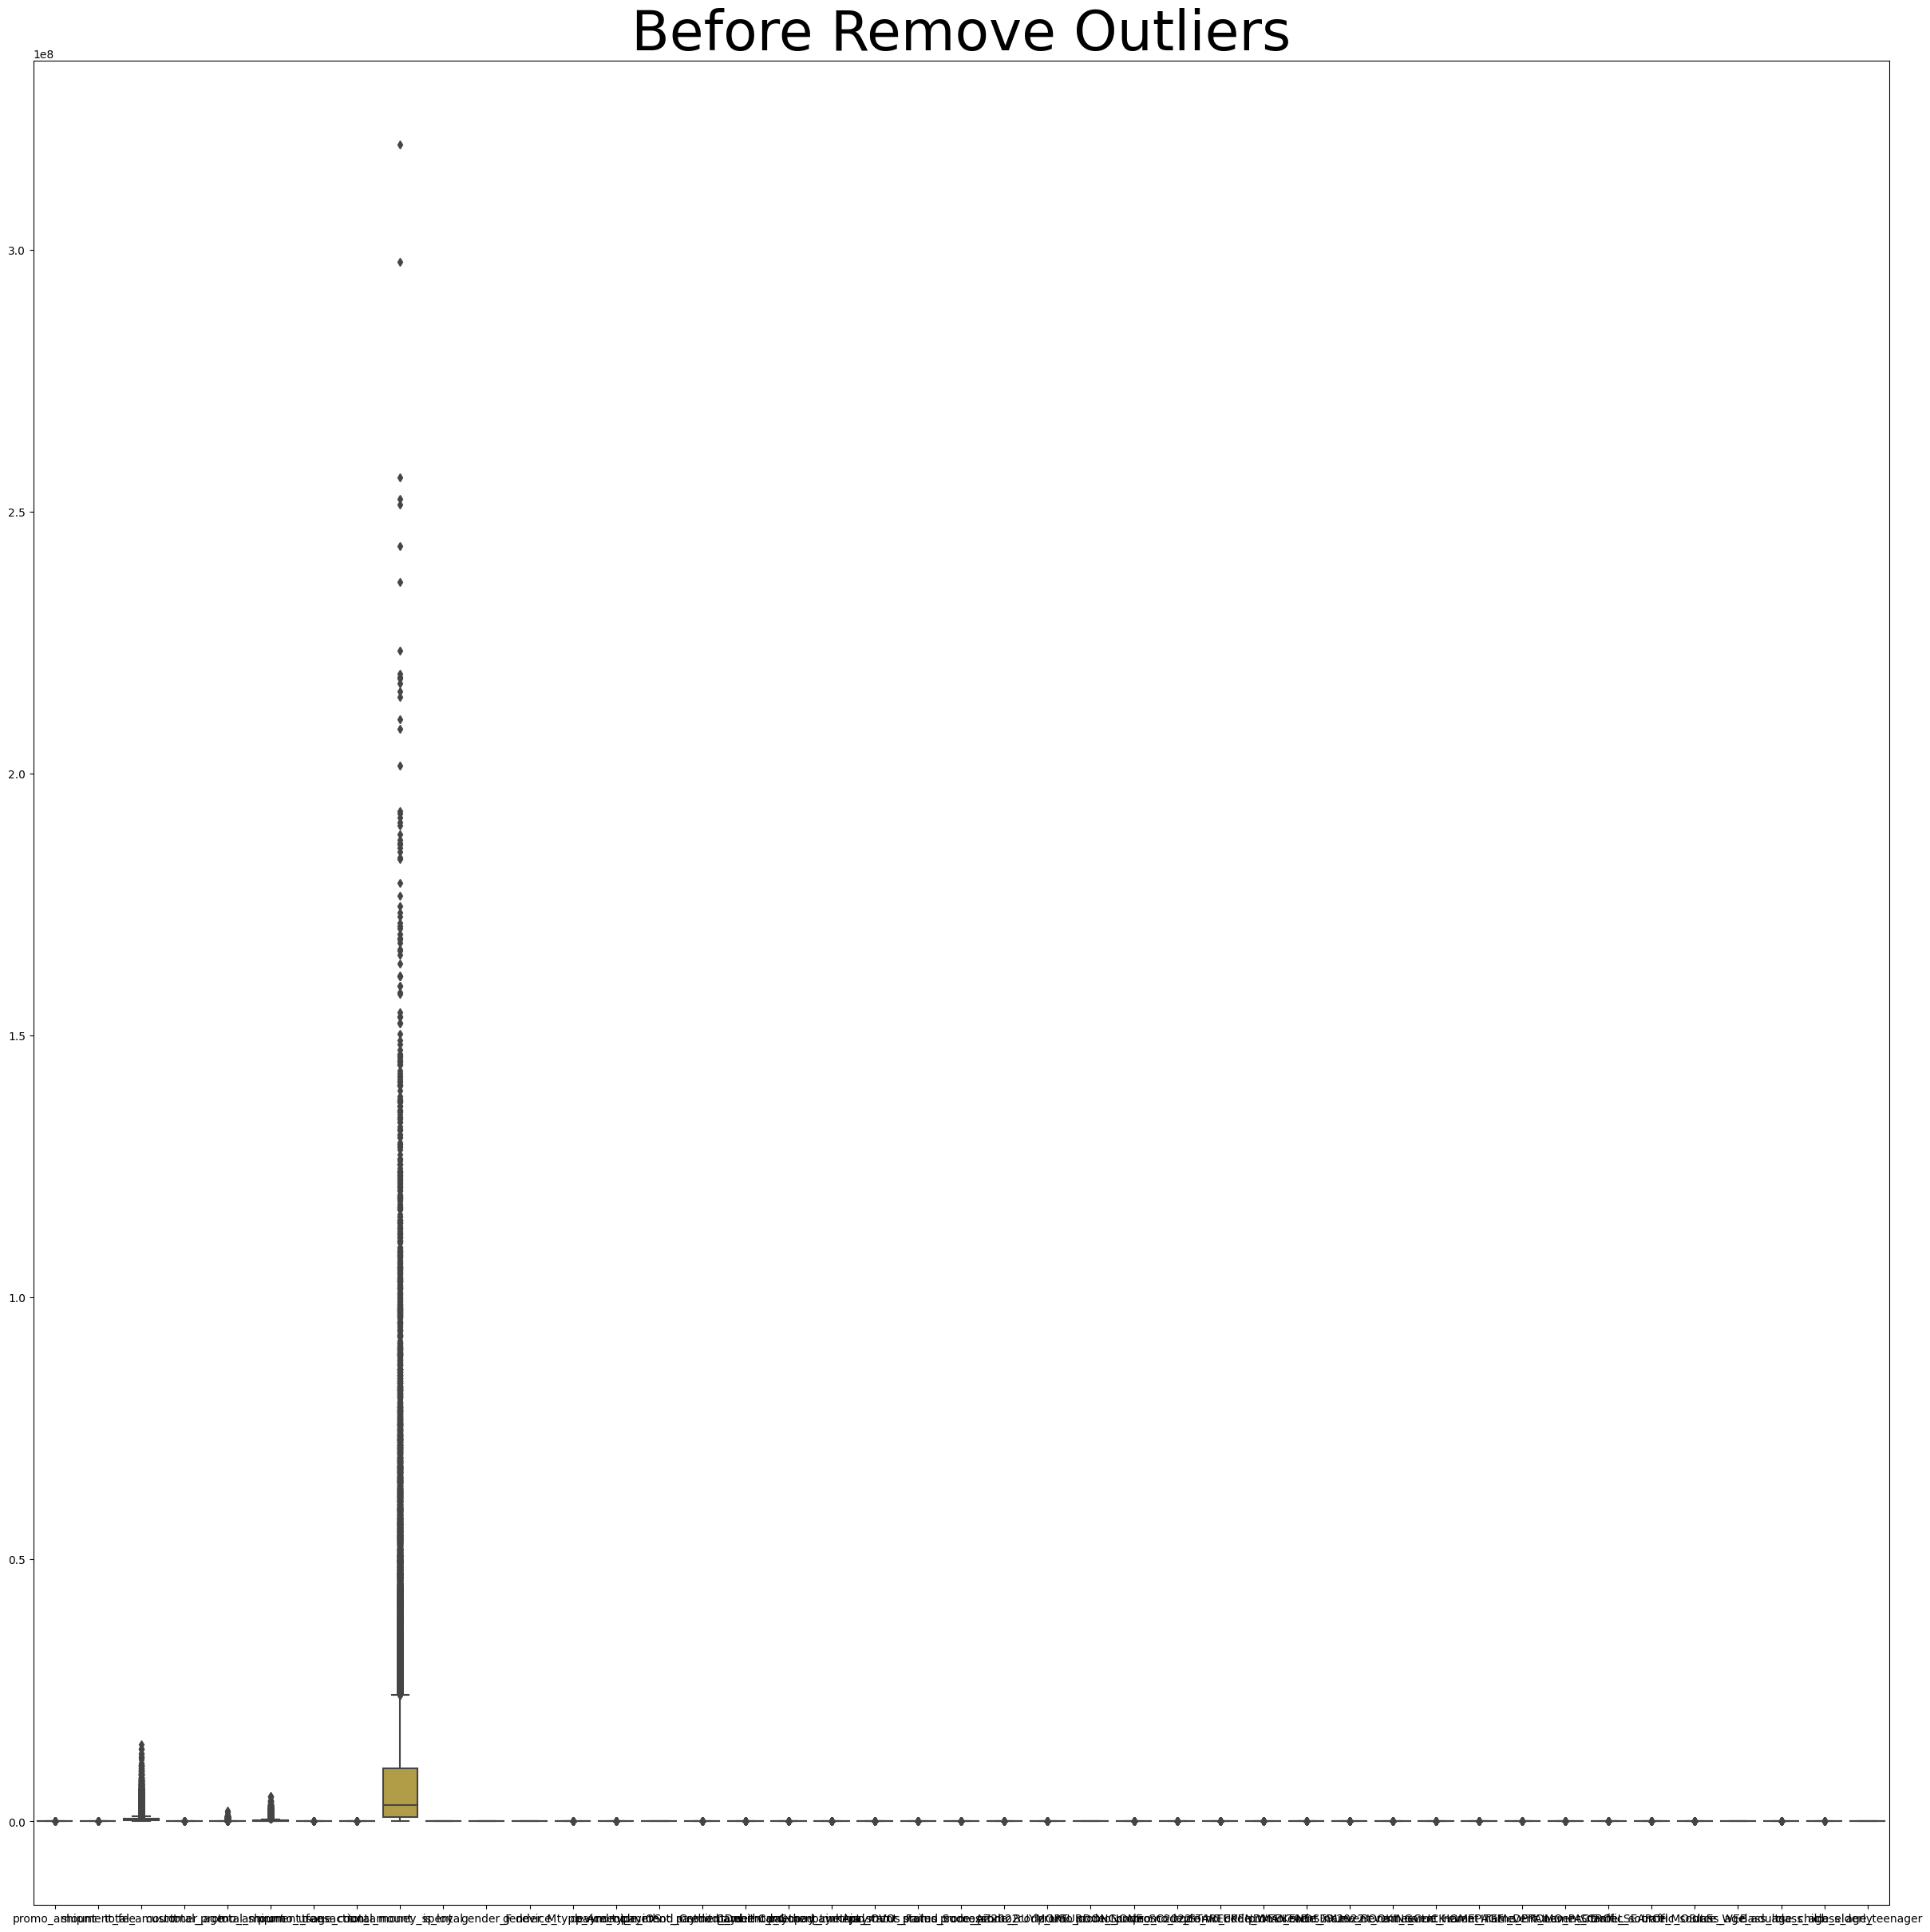

In [ ]:
# melihat outliers
fig, ax = plt.subplots(figsize=(30,30))
plt.title('Before Remove Outliers', fontsize=50)
sns.boxplot(data = df_dummies)

----> dapat dilihat pada gambar diatas, outliers tertinggi terdapat di kolom urutan ke-9, yaitu total_money_spent



In [ ]:
# Z-Score
columns = ['total_promo_amount', 'total_shipment_fee', 'total_money_spent', 'total_amount']

for i in columns:
    upper_limit = df_dummies[i].mean() + 3*df_dummies[i].std()
    lower_limit = df_dummies[i].mean() - 3*df_dummies[i].std()

    df_dummies[i] = np.where(
        df_dummies[i]>upper_limit,
        upper_limit,
        np.where(
            df_dummies[i]<lower_limit,
            lower_limit,
            df_dummies[i]
        )
    )

<Axes: title={'center': 'After Remove Outliers'}>

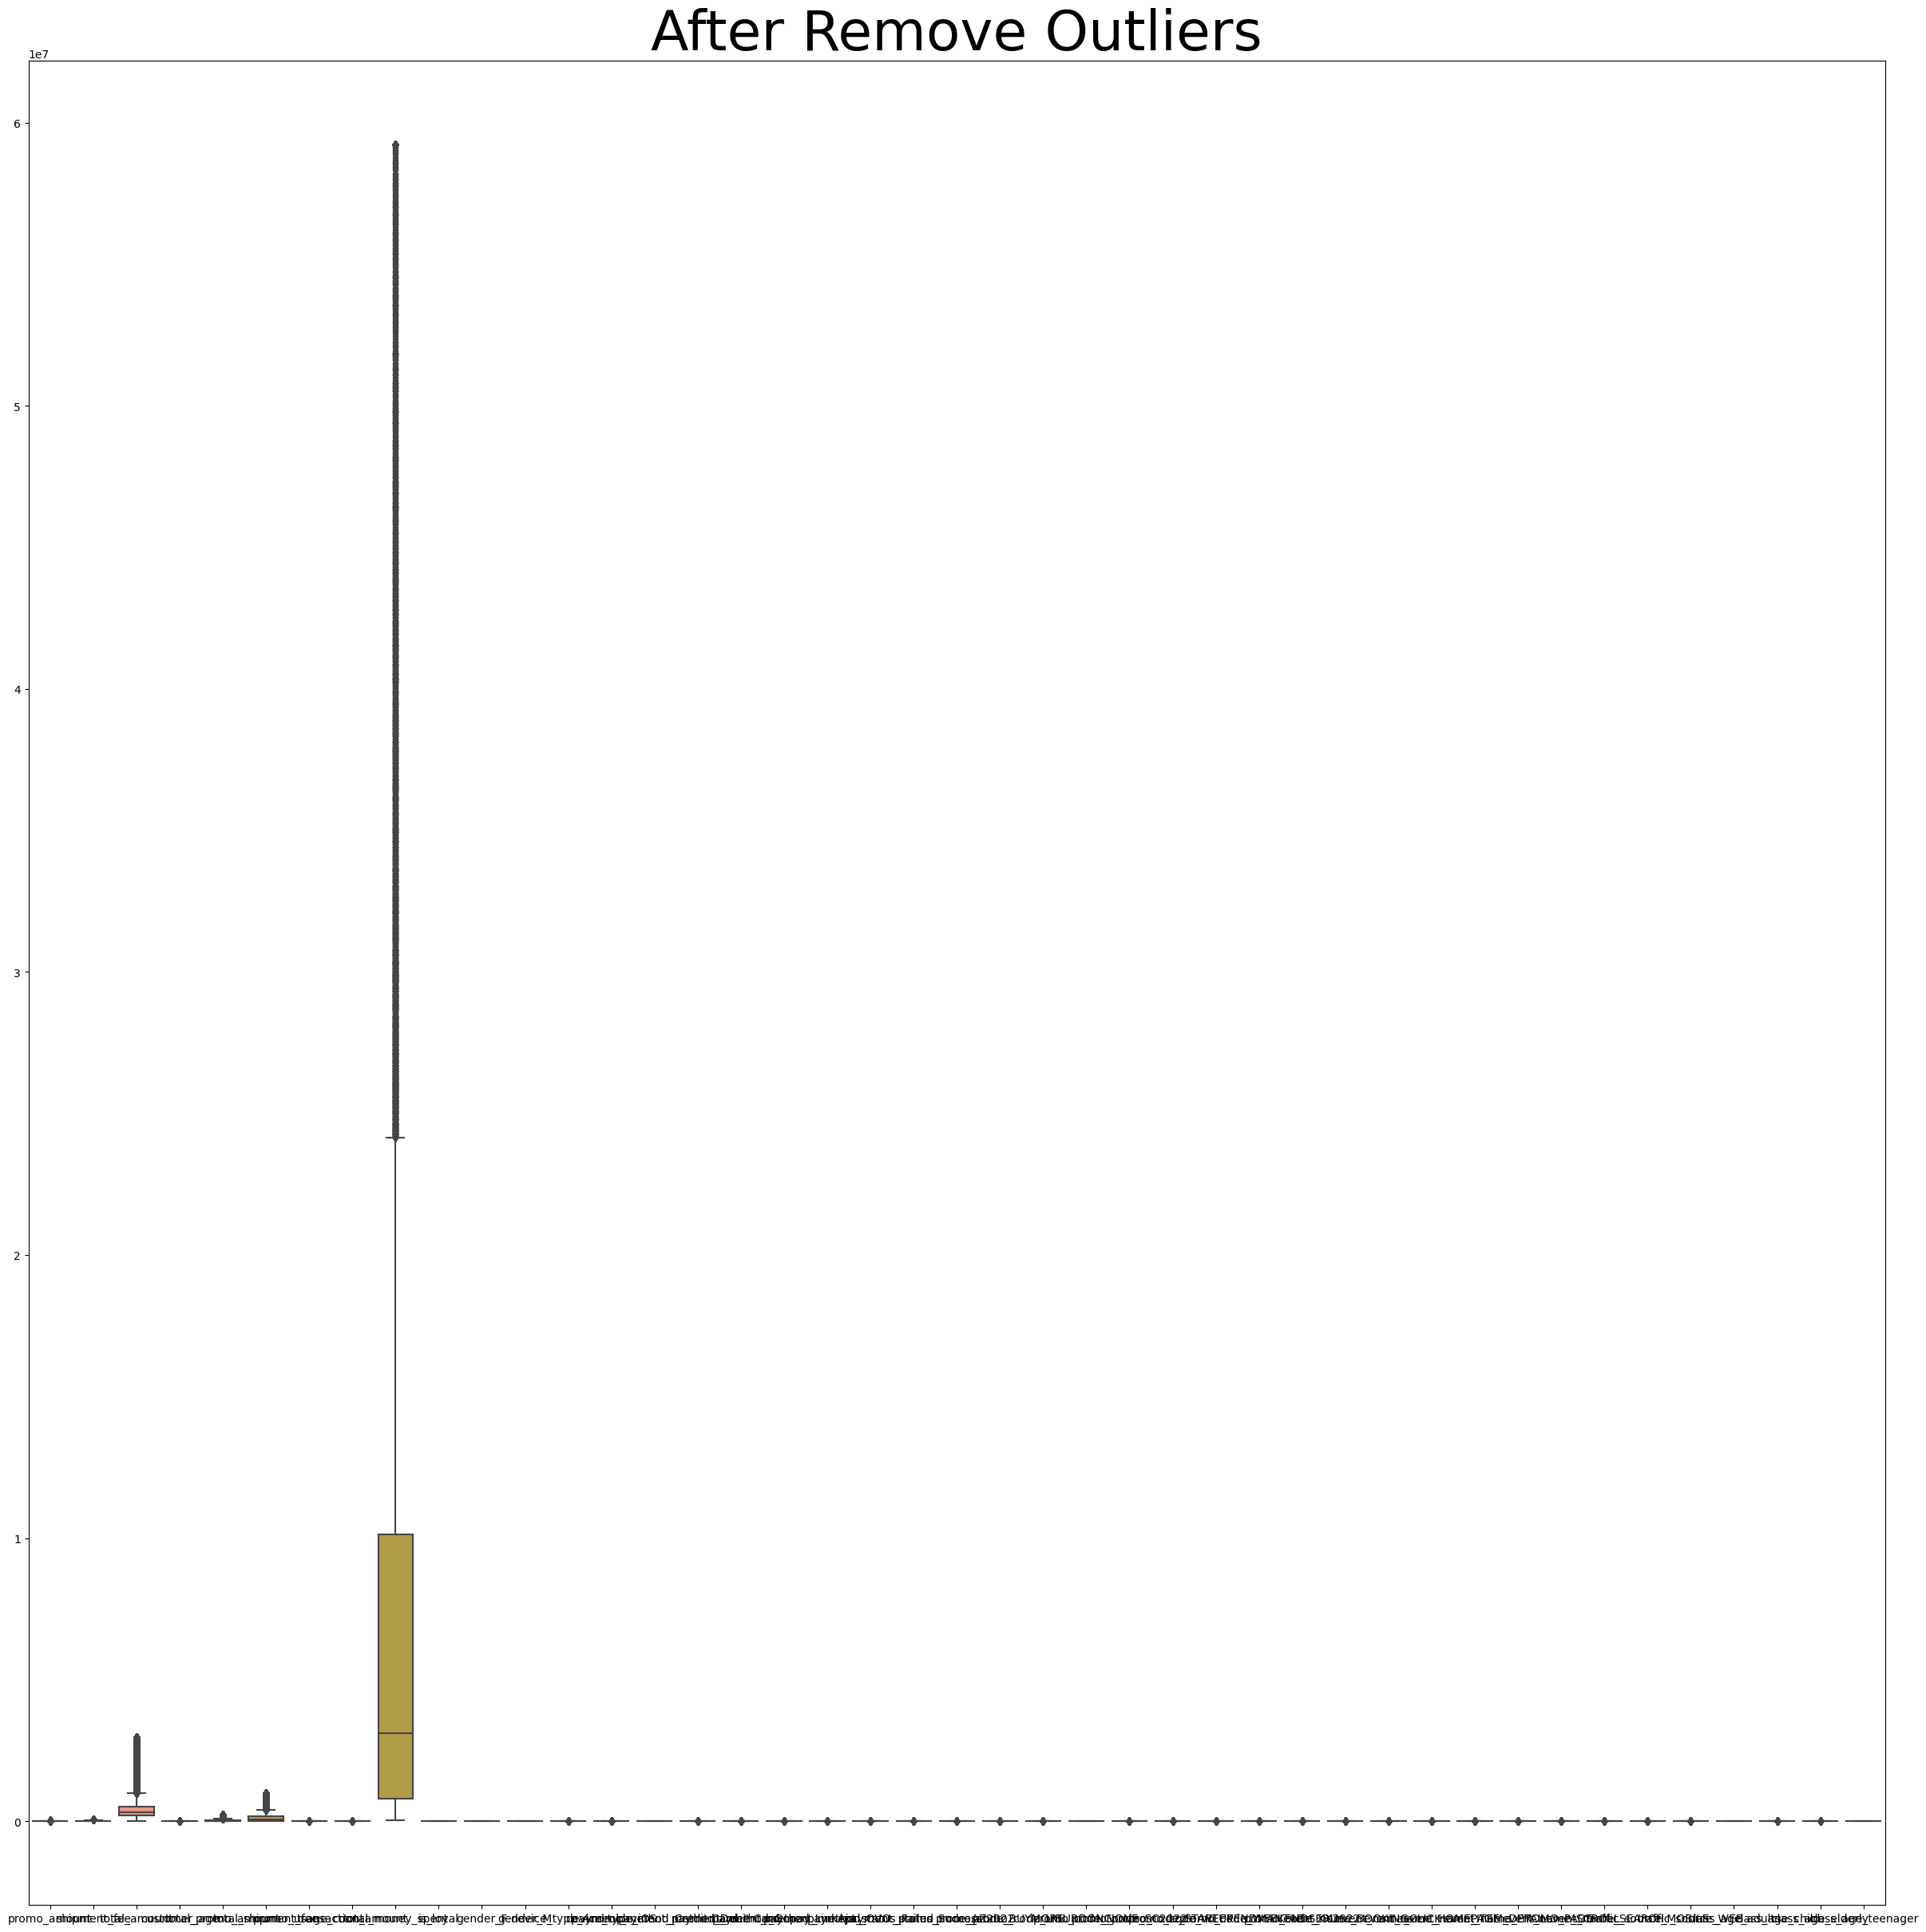

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
plt.title('After Remove Outliers', fontsize=50)
sns.boxplot(data = df_dummies)

# Handling Imbalance Data

In [ ]:
# memisahkan variable input dan target
X = df_dummies.drop(['is_loyal'], axis=1)
y = df_dummies['is_loyal']

In [ ]:
y.value_counts()

0    29756
1    20948
Name: is_loyal, dtype: int64

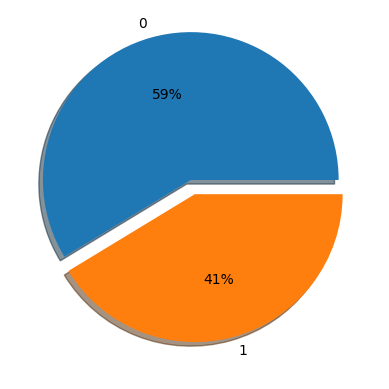

0    29756
1    20948
Name: is_loyal, dtype: int64


In [ ]:
loyal_count = df_dummies['is_loyal'].value_counts()
labels = ['0','1']
loyal = y.value_counts()
myexplode = [0.1, 0]
plt.pie(loyal, labels = labels, explode = myexplode, shadow = True, autopct='%.0f%%')
plt.show()
print(y.value_counts())

In [ ]:
X, y = SMOTE().fit_resample(X,y)

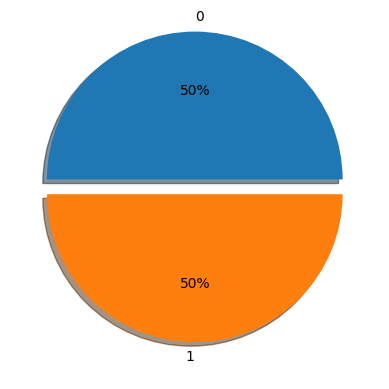

0    29756
1    29756
Name: is_loyal, dtype: int64


In [ ]:
loyal_count = df_dummies['is_loyal'].value_counts()
labels = ['0','1']
loyal = y.value_counts()
myexplode = [0.1, 0]
plt.pie(loyal, labels = labels, explode = myexplode, shadow = True, autopct='%.0f%%')
plt.show()
print(y.value_counts())

In [ ]:
# menggabungkan data kembali
df_final = pd.concat([X, y], axis=1)
df_final

,promo_amount,shipment_fee,total_amount,customer_age,total_promo_amount,total_shipment_fee,promo_usage_count,transaction_amount,total_money_spent,gender_F,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success,promo_code_AZ2022,promo_code_BUYMORE,promo_code_LIBURDONG,promo_code_NONE,promo_code_SC2022,promo_code_STARTUP,promo_code_WEEKENDMANTAP,promo_code_WEEKENDSERU,promo_code_XX2022,event_name_BOOKING,event_name_CLICK,event_name_HOMEPAGE,event_name_ITEM_DETAIL,event_name_PROMO_PAGE,event_name_SCROLL,event_name_SEARCH,traffic_source_MOBILE,traffic_source_WEB,class_age_adults,class_age_child,class_age_elderly,class_age_teenager,is_loyal
0,0.000000,10000.000000,256670.000000,31.000000,0.000000,10000.000000,0,1.000000,2.566700e+05,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
1,5272.000000,5000.000000,199897.000000,17.000000,5272.000000,5000.000000,1,1.000000,1.998970e+05,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.000000,10000.000000,996610.000000,14.000000,0.000000,10000.000000,0,1.000000,9.966100e+05,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,5952.000000,10000.000000,215548.000000,29.000000,5952.000000,10000.000000,1,1.000000,2.155480e+05,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,6060.000000,15000.000000,336925.000000,27.000000,6060.000000,15000.000000,1,1.000000,3.369250e+05,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59507,2632.135235,10819.353185,240190.362762,30.378070,33985.419218,212541.940445,6,22.163871,2.144123e+07,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
59508,0.000000,0.000000,194660.999852,29.808147,178151.010759,874745.456213,31,95.657688,4.824118e+07,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
59509,7660.649945,22928.158446,213604.889794,35.618772,243234.725752,718453.069256,41,80.513790,4.408797e+07,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
59510,2667.504604,10000.000000,820058.723888,20.807252,110662.564478,433917.015416,20,46.518131,3.134217e+07,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1


# Export Data

In [ ]:
df_final.to_csv('data_2.csv', index=False)